# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(df_data.shape)
print(df_data.columns)
print(df_data.dtypes)

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object


In [6]:
df_data.sort_values("year", ascending=True).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD


In [7]:
df_data.sort_values("year", ascending=False).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
duplicated = df_data.loc[df_data.duplicated()]
duplicated.shape[0]

0

In [9]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [10]:
df_data.isna().values.any()

True

In [11]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [12]:
columns = list(df_data.columns)

nan_dict = {}

for col in columns:
    nan_dict[col] = df_data[col].isna().sum()
    print(col, nan_dict[col])


year 0
category 0
prize 0
motivation 88
prize_share 0
laureate_type 0
full_name 0
birth_date 28
birth_city 31
birth_country 28
birth_country_current 28
sex 28
organization_name 255
organization_city 255
organization_country 254
ISO 28


In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

# nobel prize for institutions has no birth date

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [15]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

# nobel prize for literature and peace sometimes go to people without affiliated organization

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [16]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [17]:
df_data["prize_%"] = df_data.prize_share.apply(lambda x: 100*float(x.split("/")[0]) / float(x.split("/")[1]))
df_data.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


In [18]:
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
prize_%                         float64
dtype: object

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
sex = df_data.sex.value_counts(dropna=False)
print(sex)

sex
Male      876
Female     58
NaN        28
Name: count, dtype: int64


In [20]:
fig = px.pie(names=sex.index, 
             labels=sex.index, 
             values=sex.values,
             title="Winners Biological Sex",             
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [21]:
df_females = df_data.loc[df_data.sex == "Female"]
df_females.sort_values("year", ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


In [22]:
df_females = df_data[df_data.sex == "Female"]
df_females.sort_values("year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [23]:
winners = df_data.full_name.value_counts()
print(type(winners))
repeated_winners = winners[winners > 1]
print(repeated_winners)


<class 'pandas.core.series.Series'>
full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
Name: count, dtype: int64


In [24]:
multiple_winners = df_data.loc[df_data.duplicated(subset="full_name", keep=False)]
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners.sort_values(by="full_name")[col_subset]


,year,category,laureate_type,full_name
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...
306,1958,Chemistry,Individual,Frederick Sanger
505,1980,Chemistry,Individual,Frederick Sanger
297,1956,Physics,Individual,John Bardeen
424,1972,Physics,Individual,John Bardeen
278,1954,Chemistry,Individual,Linus Carl Pauling
340,1962,Peace,Individual,Linus Carl Pauling
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [25]:
categories = df_data.category.unique()
print(categories, len(categories))

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics'] 6


In [26]:
df_data.category.nunique()

6

In [27]:
prizes_per_category = df_data.category.value_counts()
print(prizes_per_category)

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64


In [28]:
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

In [29]:
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [30]:
df_data[df_data.category == "Economics"].sort_values(by="year", ascending = True)[0:3]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

In [31]:
df_category_male_female = df_data.groupby(["category", "sex"]).agg({"prize":pd.Series.count})
df_category_male_female

prize
category   sex          
Chemistry  Female      7
           Male      179
Economics  Female      2
           Male       84
Literature Female     16
           Male      101
Medicine   Female     12
           Male      210
Peace      Female     17
           Male       90
Physics    Female      4
           Male      212

In [32]:
df_category_male_female2 = df_data.groupby(["category", "sex"], as_index=False).agg({"prize":pd.Series.count})
df_category_male_female2.sort_values(by="prize", ascending=False, inplace=True)
df_category_male_female2

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [33]:
v_bar_split = px.bar(x = df_category_male_female2.category,
                     y = df_category_male_female2.prize,
                     color = df_category_male_female2.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [34]:

prizes_per_year = df_data.groupby(["year"]).agg({"year":pd.Series.count})
print(prizes_per_year)

      year
year      
1901     6
1902     7
1903     7
1904     6
1905     5
...    ...
2016    11
2017    12
2018    13
2019    14
2020    12

[117 rows x 1 columns]


In [35]:
prizes_per_year2 = df_data.groupby(["year"]).count().prize
print(prizes_per_year)

      year
year      
1901     6
1902     7
1903     7
1904     6
1905     5
...    ...
2016    11
2017    12
2018    13
2019    14
2020    12

[117 rows x 1 columns]


In [36]:
prizes_per_year_mov_avg = prizes_per_year.rolling(5).mean()

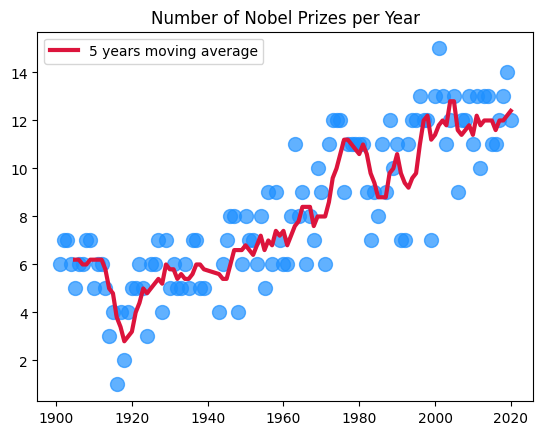

In [37]:
plt.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prizes_per_year.index, 
        prizes_per_year_mov_avg.values, 
        c='crimson', 
        linewidth=3,
        label="5 years moving average")

plt.title("Number of Nobel Prizes per Year")
plt.legend()
plt.show()

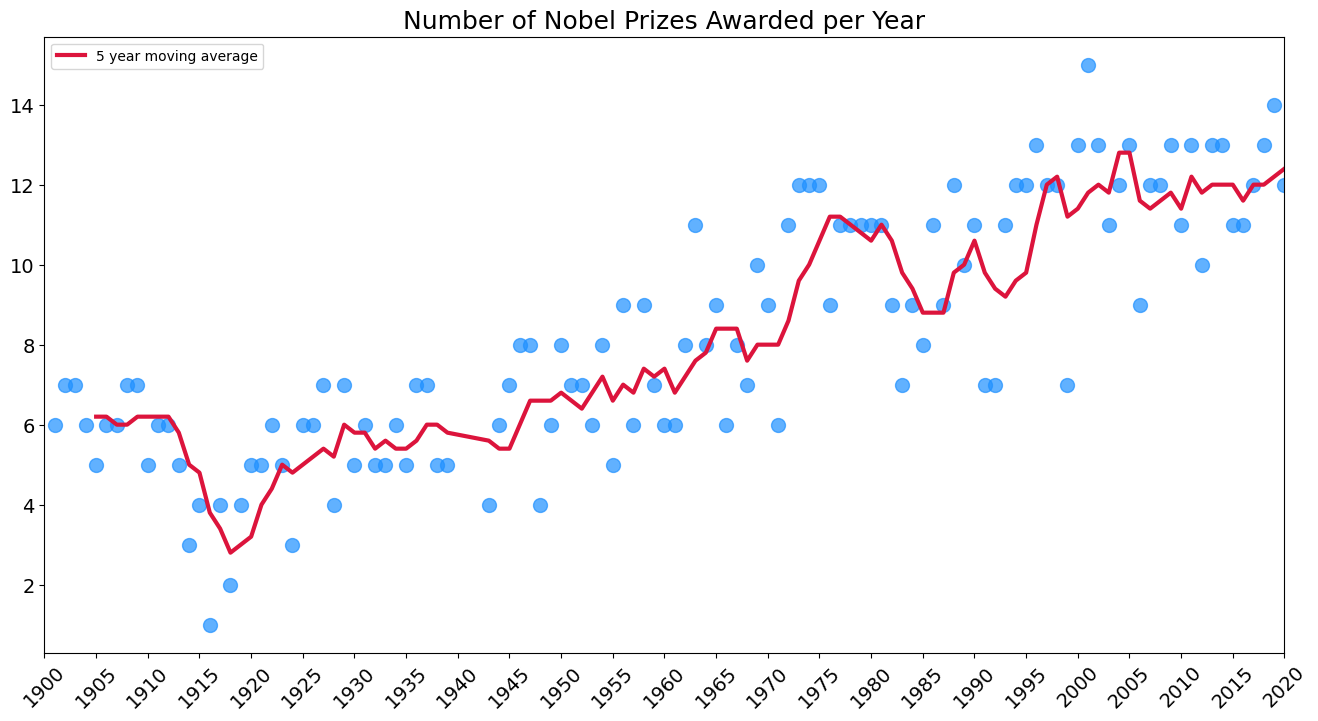

In [38]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prizes_per_year.index, 
        prizes_per_year_mov_avg.values, 
        c='crimson', 
        linewidth=3,
        label="5 year moving average")

plt.legend()
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [39]:
prize_share_per_year = df_data.groupby(["year"]).agg({"prize_%":pd.Series.mean})
prize_share_per_year.head()

,prize_%
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00


In [40]:
prize_share_per_year_mov_avg = prize_share_per_year.rolling(5).mean()

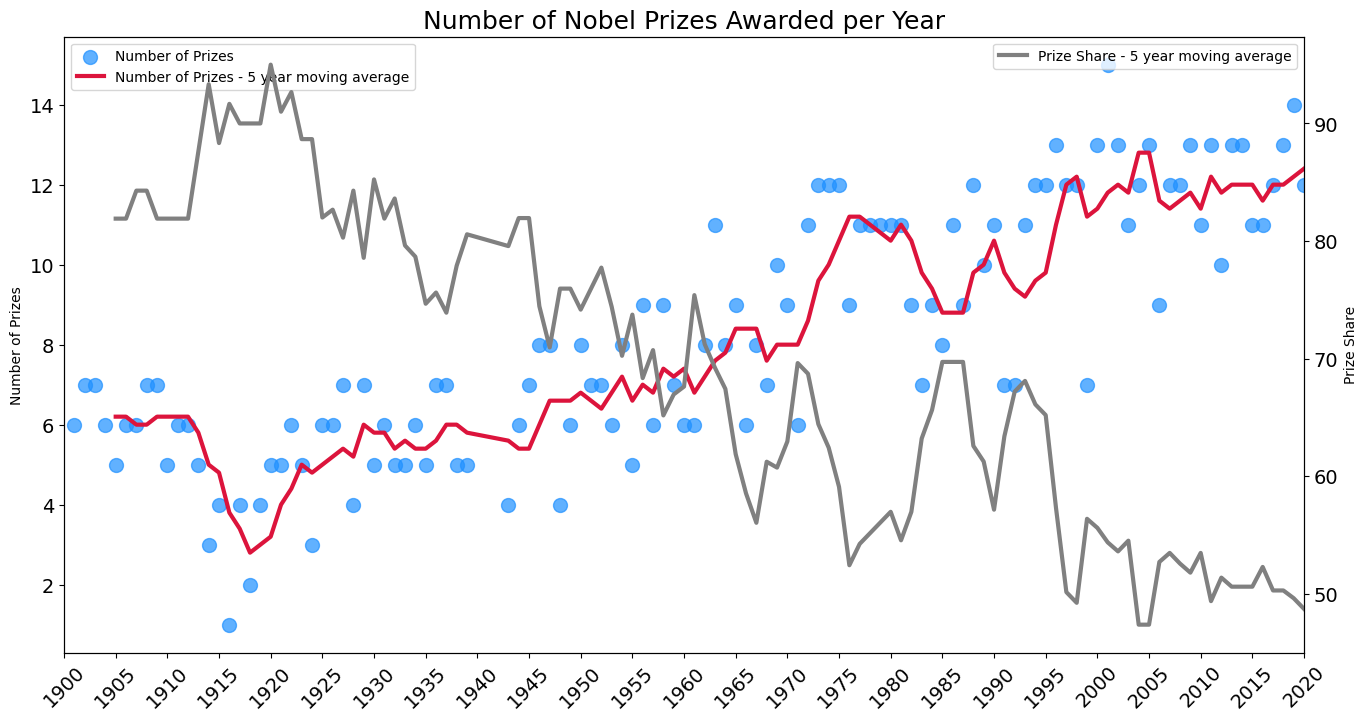

In [41]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax1.set_xlim(1900, 2020)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_ylabel("Number of Prizes")

ax1.scatter(x=prizes_per_year.index, 
            y=prizes_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,
            label="Number of Prizes")
 
ax1.plot(prizes_per_year.index, 
         prizes_per_year_mov_avg.values, 
         c='crimson', 
         linewidth=3,
         label="Number of Prizes - 5 year moving average")

# Adding prize share plot on second axis
ax2 = ax1.twinx()
ax2.set_ylabel("Prize Share")
ax2.tick_params(axis='y', labelsize=14)

ax2.plot(prize_share_per_year.index, 
         prize_share_per_year_mov_avg.values, 
         c='grey', 
         linewidth=3,
         label="Prize Share - 5 year moving average")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

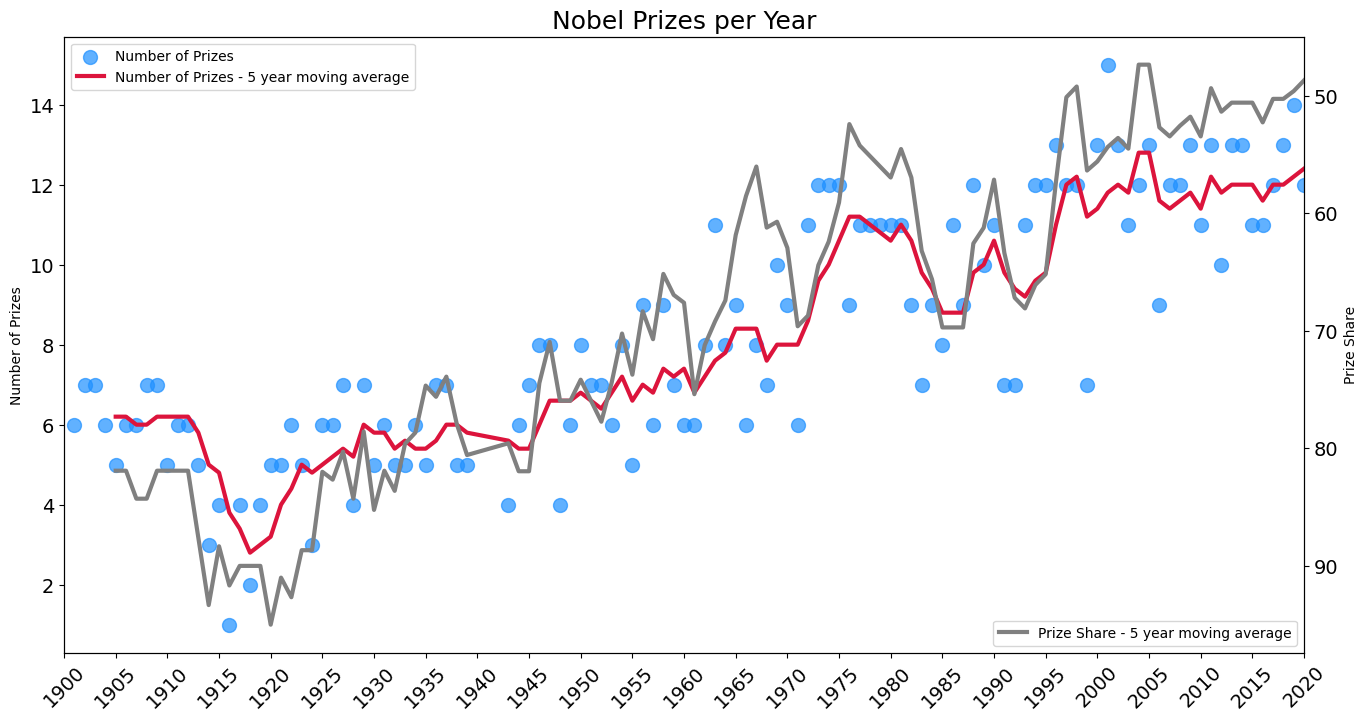

In [42]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Nobel Prizes per Year', fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax1.set_xlim(1900, 2020)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_ylabel("Number of Prizes")
ax1.scatter(x=prizes_per_year.index, 
            y=prizes_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,
            label="Number of Prizes")
 
ax1.plot(prizes_per_year.index, 
         prizes_per_year_mov_avg.values, 
         c='crimson', 
         linewidth=3,
         label="Number of Prizes - 5 year moving average")

ax2 = ax1.twinx() # create second y=axis
ax2.set_ylabel("Prize Share")
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelsize=14)

# Adding prize share plot on second axis
ax2.plot(prize_share_per_year.index, 
         prize_share_per_year_mov_avg.values, 
         c='grey', 
         linewidth=3,
         label="Prize Share - 5 year moving average")

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

In [43]:
categories_per_year = df_data.groupby("year").agg({"category":pd.Series.count})
categories_per_year.head(10)

,category
year,
1901,6
1902,7
1903,7
1904,6
1905,5
1906,6
1907,6
1908,7
1909,7


In [44]:
categories_per_year.tail(10)

,category
year,
2011,13
2012,10
2013,13
2014,13
2015,11
2016,11
2017,12
2018,13
2019,14


In [45]:
categories_per_year_mov_avg = categories_per_year.rolling(5).mean()

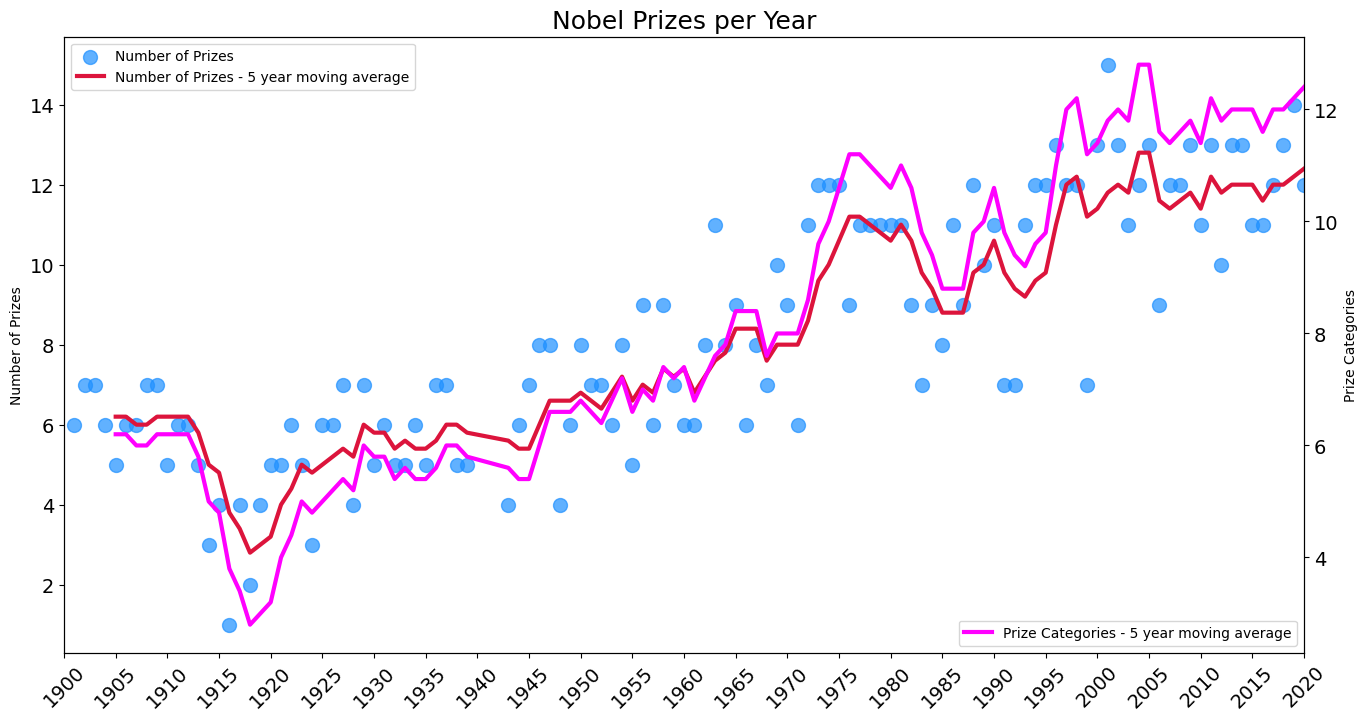

In [46]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Nobel Prizes per Year', fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax1.set_xlim(1900, 2020)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_ylabel("Number of Prizes")
ax1.scatter(x=prizes_per_year.index, 
            y=prizes_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,
            label="Number of Prizes")
 
ax1.plot(prizes_per_year.index, 
         prizes_per_year_mov_avg.values, 
         c='crimson', 
         linewidth=3,
         label="Number of Prizes - 5 year moving average")

ax2 = ax1.twinx()
ax2.set_ylabel("Prize Categories")
ax2.tick_params(axis='y', labelsize=14)

ax2.plot(categories_per_year_mov_avg.index, 
         categories_per_year_mov_avg.values, 
         c='magenta', 
         linewidth=3,
         label="Prize Categories - 5 year moving average")



ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

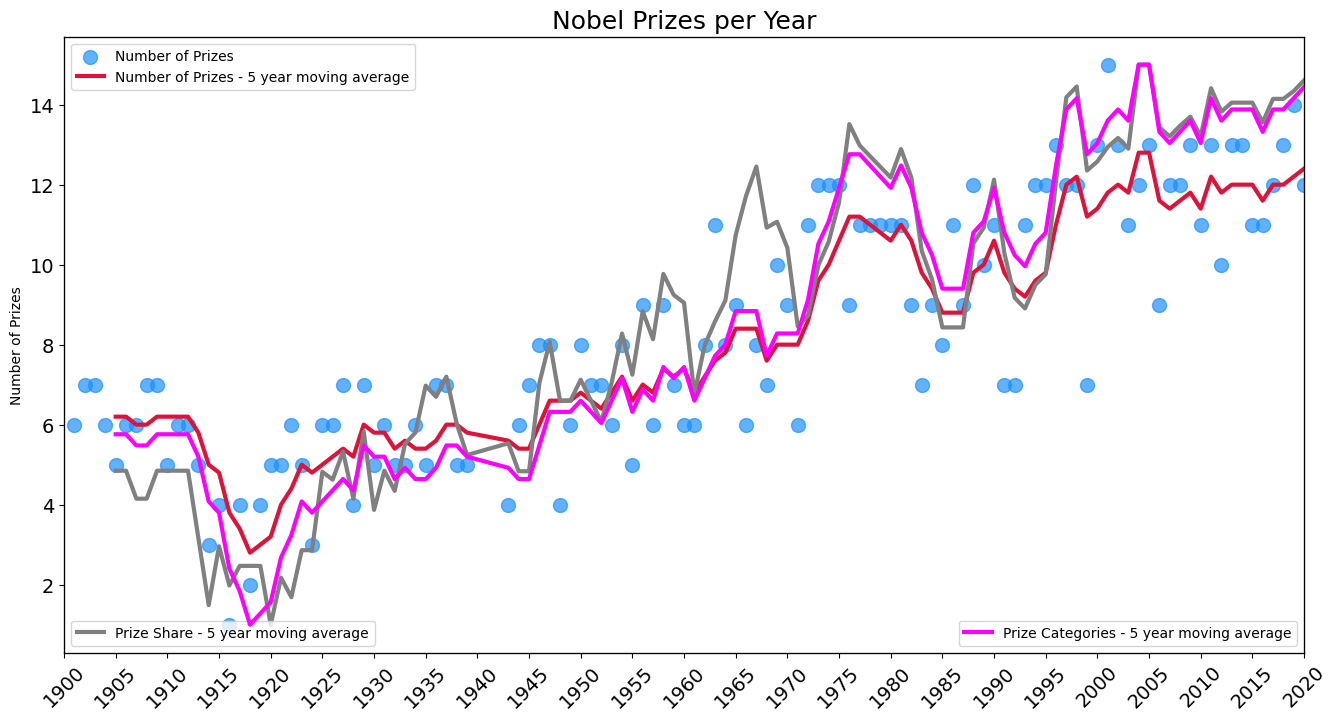

In [47]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Nobel Prizes per Year', fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax1.set_xlim(1900, 2020)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_ylabel("Number of Prizes")
ax1.scatter(x=prizes_per_year.index, 
            y=prizes_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,
            label="Number of Prizes")
 
ax1.plot(prizes_per_year.index, 
         prizes_per_year_mov_avg.values, 
         c='crimson', 
         linewidth=3,
         label="Number of Prizes - 5 year moving average")

ax2 = ax1.twinx()
ax2.invert_yaxis()
ax2.set_yticklabels([])
ax2.tick_params(axis='y', size=0)

ax2.plot(prize_share_per_year.index, 
         prize_share_per_year_mov_avg.values, 
         c='grey', 
         linewidth=3,
         label="Prize Share - 5 year moving average")

ax3 = ax1.twinx()
ax3.set_yticklabels([])
ax3.tick_params(axis='y', size=0)

ax3.plot(categories_per_year_mov_avg.index, 
         categories_per_year_mov_avg.values, 
         c='magenta', 
         linewidth=3,
         label="Prize Categories - 5 year moving average")

ax1.legend(loc='upper left')
ax2.legend(loc='lower left')
ax3.legend(loc='lower right')

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [48]:
print(df_data.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'prize_%'],
      dtype='object')


In [49]:
col_subset = ['birth_country', 'birth_country_current','ISO','organization_country']
df_data[col_subset].head(20)

,birth_country,birth_country_current,ISO,organization_country
0,Netherlands,Netherlands,NLD,Germany
1,France,France,FRA,NaN
2,Prussia (Poland),Poland,POL,Germany
3,France,France,FRA,NaN
4,Switzerland,Switzerland,CHE,NaN
5,Prussia (Germany),Germany,DEU,Germany
6,Prussia (Germany),Germany,DEU,Germany
7,Schleswig (Germany),Germany,DEU,NaN
8,India,India,IND,United Kingdom
9,Switzerland,Switzerland,CHE,NaN


In [50]:
df_data[col_subset].tail(20)

,birth_country,birth_country_current,ISO,organization_country
942,Austria,Austria,AUT,NaN
943,United States of America,United States of America,USA,United States of America
944,United Kingdom,United Kingdom,GBR,United Kingdom
945,United States of America,United States of America,USA,United States of America
946,Ethiopia,Ethiopia,ETH,NaN
947,Switzerland,Switzerland,CHE,Switzerland
948,Canada,Canada,CAN,United States of America
949,Switzerland,Switzerland,CHE,Switzerland
950,France,France,FRA,Germany
951,United States of America,United States of America,USA,United States of America


In [51]:
countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
countries.head()


,birth_country_current,prize
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1


In [52]:
top20_countries = countries.sort_values(by='prize', ascending=False, ignore_index=True)[:20]
top20_countries

,birth_country_current,prize
0,United States of America,281
1,United Kingdom,105
2,Germany,84
3,France,57
4,Sweden,29
5,Japan,27
6,Poland,27
7,Russia,26
8,Canada,20
9,Switzerland,19


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [53]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

h_bar.update_yaxes(autorange="reversed")
h_bar.show()

In [54]:
countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
countries.sort_values(by='prize', ascending=False, ignore_index=True, inplace=True)
countries.head(80)

,birth_country_current,ISO,prize
0,United States of America,USA,281
1,United Kingdom,GBR,105
2,Germany,DEU,84
3,France,FRA,57
4,Sweden,SWE,29
...,...,...,...
74,Iceland,ISL,1
75,Madagascar,MDG,1
76,Indonesia,IDN,1
77,Iraq,IRQ,1


In [55]:
nobel_world_map = px.choropleth(countries,
                                locations='ISO',
                                color='prize', 
                                hover_name='birth_country_current', 
                                color_continuous_scale=px.colors.sequential.matter)
 
nobel_world_map.update_layout(coloraxis_showscale=True,
                              width=800,
                              height=500)
 
nobel_world_map.show()

In [56]:
df_data[df_data.ISO == "BRA"]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%
324,1960,Medicine,The Nobel Prize in Physiology or Medicine 1960,"""for discovery of acquired immunological toler...",1/2,Individual,Peter Brian Medawar,1915-02-28,Rio de Janeiro,Brazil,Brazil,Male,University College London,London,United Kingdom,BRA,50.00


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [57]:
df_country_category = df_data.groupby(["birth_country_current", "category"], 
    as_index=False).agg({'prize': pd.Series.count})
df_country_category.sort_values(by="prize", ascending=False, inplace=True)
df_country_category

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [58]:
top20_countries

,birth_country_current,prize
0,United States of America,281
1,United Kingdom,105
2,Germany,84
3,France,57
4,Sweden,29
5,Japan,27
6,Poland,27
7,Russia,26
8,Canada,20
9,Switzerland,19


In [59]:
merged_df = pd.merge(df_country_category, top20_countries, on='birth_country_current')
merged_df

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
104,India,Literature,2,9
105,India,Medicine,2,9
106,India,Chemistry,1,9
107,India,Peace,1,9


In [60]:
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
104,India,Literature,2,9
105,India,Medicine,2,9
106,India,Chemistry,1,9
107,India,Peace,1,9


In [61]:
merged_df.sort_values(by='total_prize', ascending=False, inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
5,United States of America,Literature,10,281
...,...,...,...,...
91,South Africa,Chemistry,1,9
96,Belgium,Physics,1,9
95,Belgium,Literature,1,9
94,Belgium,Chemistry,1,9


In [62]:
country_cat_bar = px.bar(x=merged_df.cat_prize,
                         y=merged_df.birth_country_current,
                         orientation='h',
                         color=merged_df.category,
                         color_continuous_scale='Viridis',
                         title='Top 20 Countries by Number of Prizes and Category')
 
country_cat_bar.update_layout(xaxis_title='Number of Prizes', 
                              yaxis_title='Country',
                              coloraxis_showscale=False,
                              width=1000,
                              height=500)

country_cat_bar.update_yaxes(autorange="reversed")
country_cat_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [63]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,prize_%
0,Algeria,1957,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
1,Algeria,1997,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Argentina,1936,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
3,Argentina,1947,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Argentina,1980,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,United States of America,2020,7,7,7,7,7,7,7,7,7,7,6,6,6,7,7
623,Venezuela,1980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,Vietnam,1973,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
625,Yemen,2011,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [64]:
prize_by_year = prize_by_year.sort_values(by='year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [65]:
prize_by_year.sort_values(by='prize', inplace=True, )
prize_by_year

,year,birth_country_current,prize
158,2020,France,1
44,1974,Belgium,1
217,2008,Germany,1
145,1974,France,1
338,1973,Norway,1
...,...,...,...
606,2004,United States of America,7
596,1993,United States of America,7
603,2001,United States of America,8
594,1990,United States of America,8


In [66]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current','year']).sum().groupby('birth_country_current').cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [67]:
data = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
}

df = pd.DataFrame(data)

# Get the name of the last column
last_column = df.columns[-1]

# Calculate the cumulative sum of the last column
df[last_column + '_cumsum'] = df[last_column].cumsum()

# Display the DataFrame with the cumulative sum column
print(df)

   A  B   C  C_cumsum
0  1  5   9         9
1  2  6  10        19
2  3  7  11        30
3  4  8  12        42


In [68]:
cumulative_prizes2 = prize_by_year.groupby(by=['birth_country_current','year'])["prize"].cumsum()
cumulative_prizes2

158    1
44     1
217    1
145    1
338    1
      ..
606    7
596    7
603    8
594    8
577    8
Name: prize, Length: 627, dtype: int64

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [71]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False,  
                      width=800,
                      height=500)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [73]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
top20_org_cities

organization_city
Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: count, dtype: int64

In [74]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False,
                       width=800,
                       height=500)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [75]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [76]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False,
                       width=800,
                       height=500)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [77]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [78]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?')
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False,
                    width=700,
                    height=600)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [79]:
birth_years = df_data.birth_date.dt.year
birth_years

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        NaN
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

In [80]:
df_data['winning_age'] = df_data.year - birth_years

In [81]:
df_data.get(["full_name","winning_age"])

,full_name,winning_age
0,Jacobus Henricus van 't Hoff,49.00
1,Sully Prudhomme,62.00
2,Emil Adolf von Behring,47.00
3,Frédéric Passy,79.00
4,Jean Henry Dunant,73.00
...,...,...
957,Michael Houghton,71.00
958,World Food Programme (WFP),NaN
959,Andrea Ghez,55.00
960,Reinhard Genzel,68.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [82]:
display(df_data.nlargest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


In [83]:
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


In [84]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

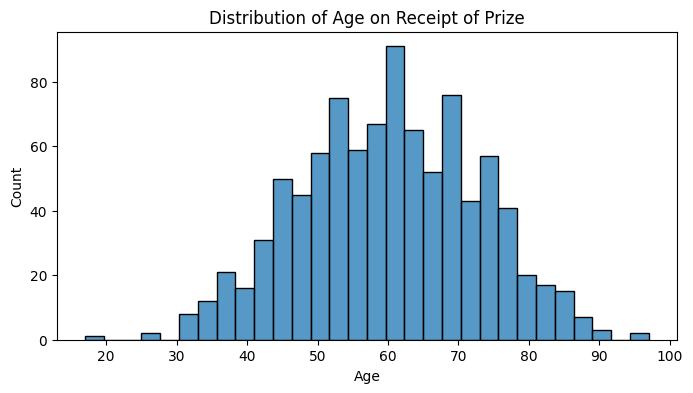

In [85]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

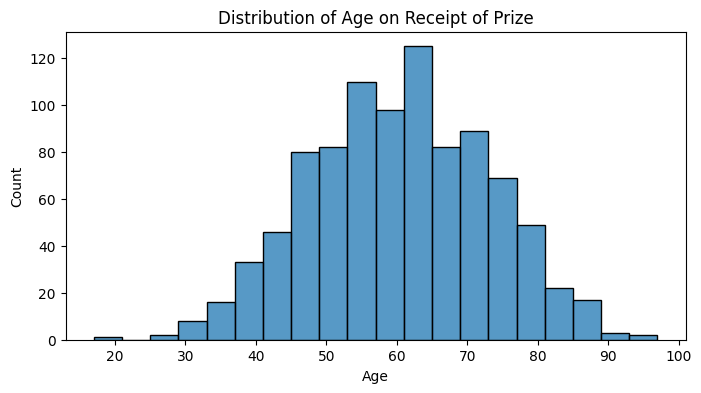

In [86]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

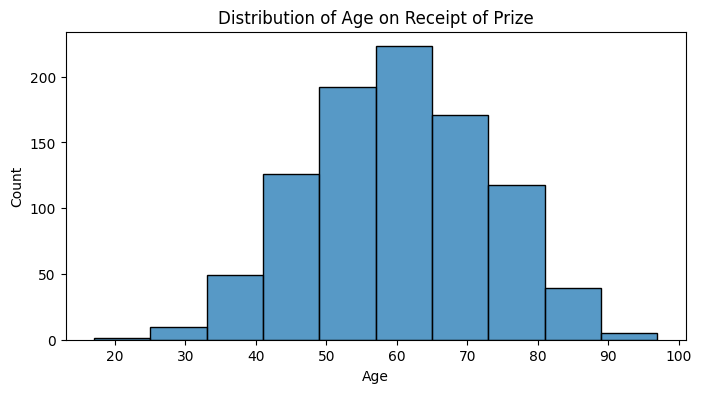

In [87]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=10)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

In [88]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_%,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00,62.00


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


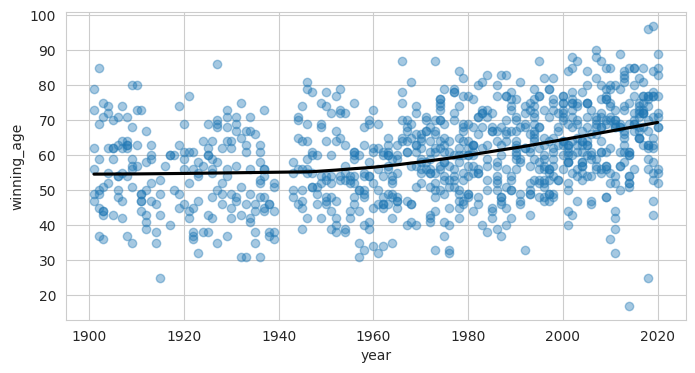

In [90]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

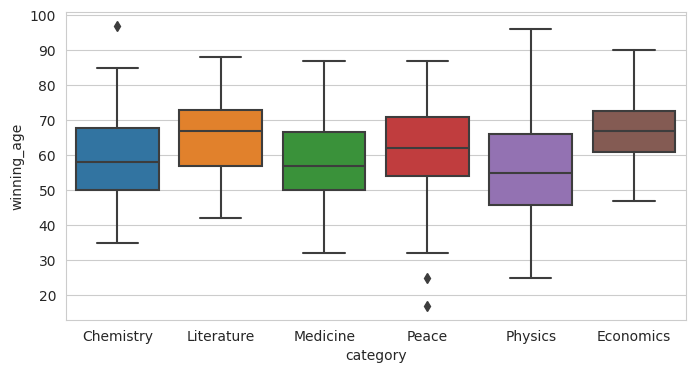

In [92]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


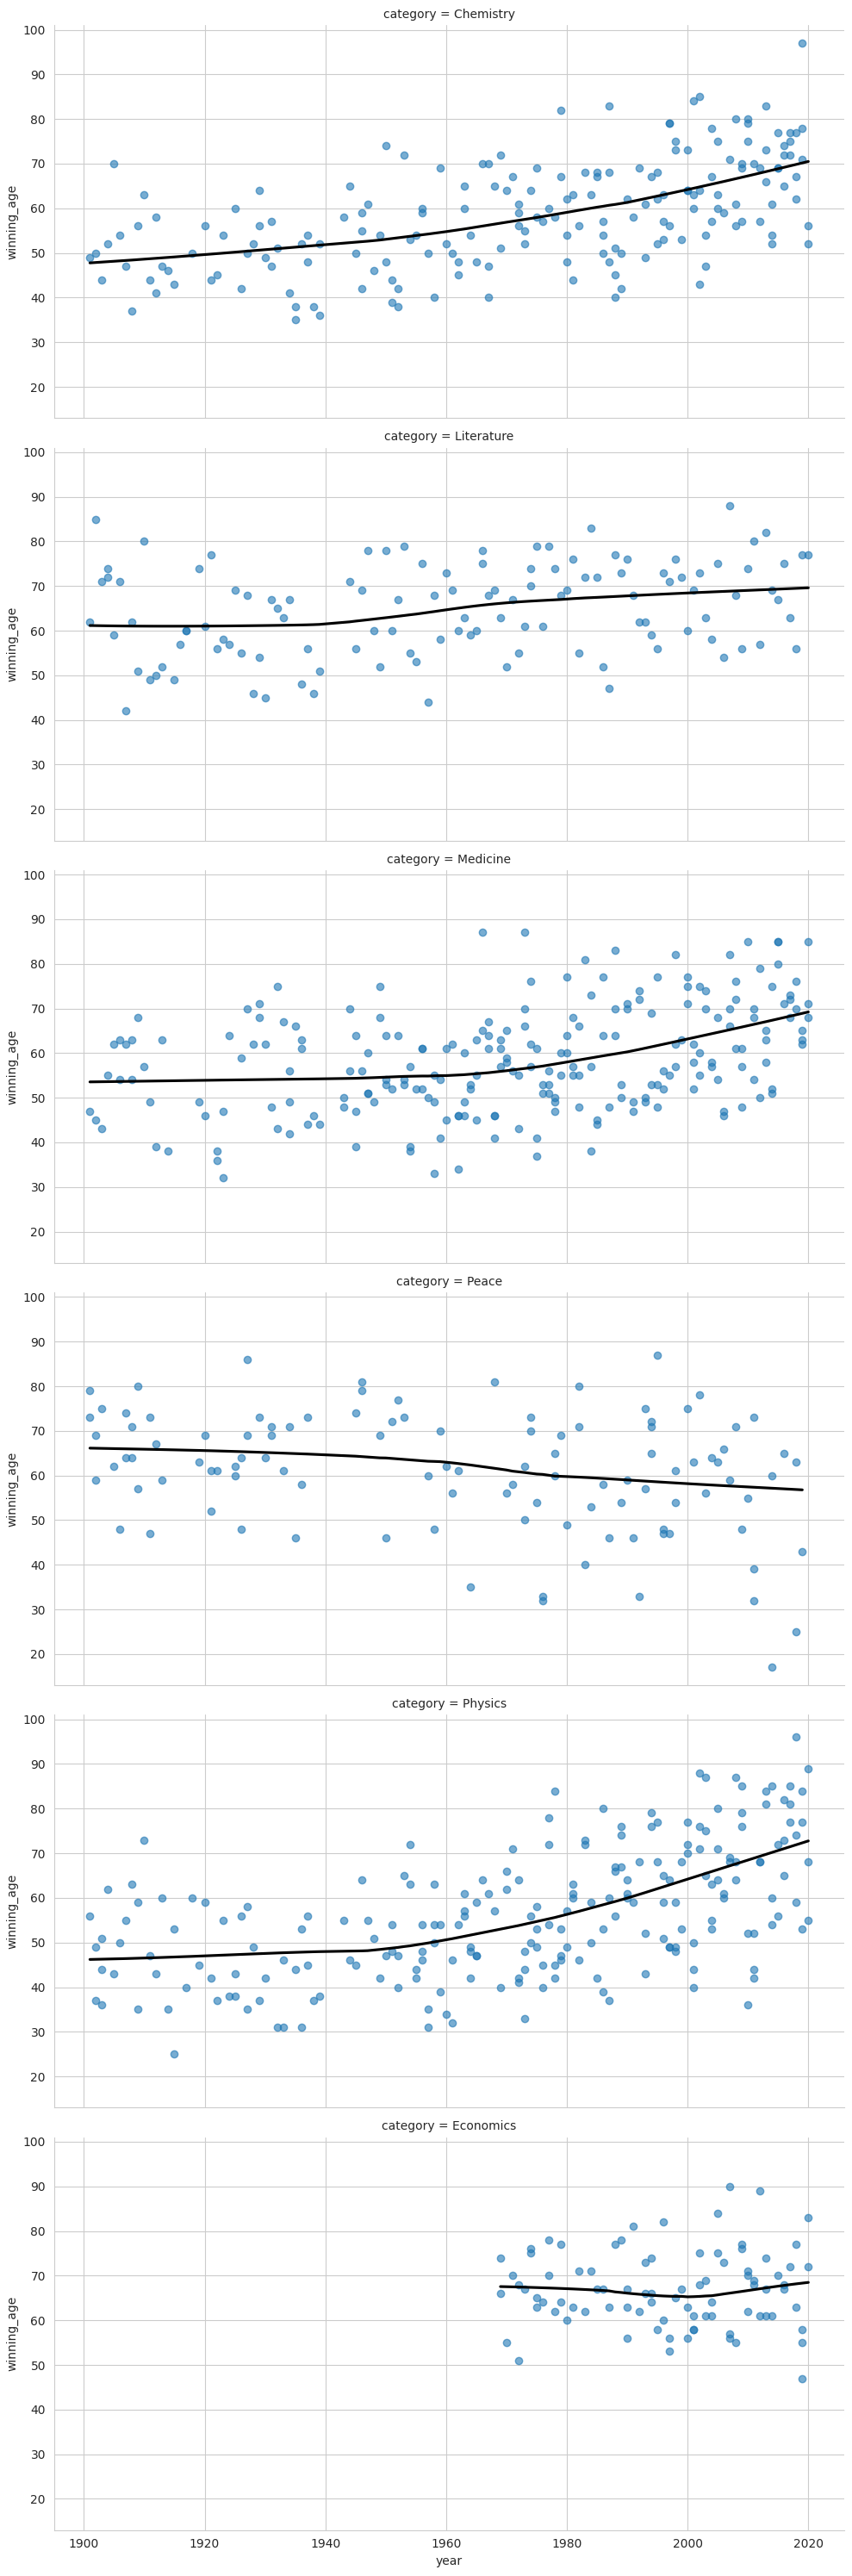

In [93]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

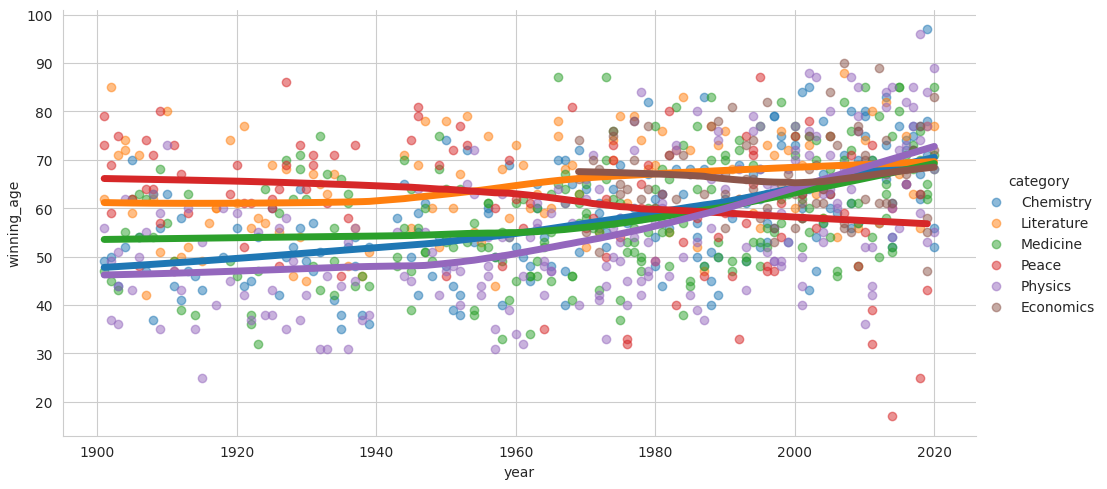

In [94]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()